In [1]:
# Importing useful libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')


In [2]:
# Importing some scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
#from scripts.visualization_logger import logger

DC = DataCleaner()
DV = Data_Viz()

In [3]:
# Reading the merged dataset

merged_data = pd.read_excel(r'C:\Users\hp\OneDrive - students.jkuat.ac.ke\Desktop\Tiko\merged_data.xlsx')
merged_data.head()

,Rafiki Id,Call status,Gender,Year of birth,Visited facility,Were you given a tiko card?,Satisfaction,Feedback,Concerns,Notes,...,Event Id,Offer Trader Name,Enrolment Path Classifier,Enrolment Type,Offer Trader County Name,Offer Trader Business Organisation,Offer Redemption Date,Service Type,Actor Role,Tiko Amount
0,1920703,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488030850,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,26/06/2024 12:14:28,OC,Agent,125
1,1920703,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488030850,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,26/06/2024 12:14:28,OC,Provider,150
2,1920703,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488030850,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,26/06/2024 12:14:28,OC,Rafiki,60
3,2016625,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488033730,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,26/06/2024 12:15:45,IMP,Agent,50
4,2016625,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488033730,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,26/06/2024 12:15:45,IMP,Provider,690


In [4]:
# Checking the data

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rafiki Id                           4134 non-null   int64  
 1   Call status                         4134 non-null   object 
 2   Gender                              237 non-null    object 
 3   Year of birth                       237 non-null    object 
 4   Visited facility                    237 non-null    object 
 5   Were you given a tiko card?         216 non-null    object 
 6   Satisfaction                        216 non-null    object 
 7   Feedback                            216 non-null    object 
 8   Concerns                            133 non-null    object 
 9   Notes                               0 non-null      float64
 10  Month                               4134 non-null   object 
 11  Event Id                            4134 no

In [5]:
# Removing the rafiki id since it is irrelevant for the analysis

del merged_data['Rafiki Id']


In [6]:
# Removing the event id field since it is irrelevant for the analysis

del merged_data['Event Id']

In [7]:
# Removing the event id field since it is irrelevant for the analysis

del merged_data['Notes']

In [8]:
del merged_data['Gender']

In [9]:
del merged_data['Year of birth']

In [10]:
del merged_data['Visited facility']

In [11]:
del merged_data['Were you given a tiko card?']

In [12]:
del merged_data['Satisfaction']

In [13]:
del merged_data['Feedback']

In [14]:
del merged_data['Concerns']

In [15]:
merged_data.isnull().sum()

Call status                           0
Month                                 0
Offer Trader Name                     0
Enrolment Path Classifier             0
Enrolment Type                        0
Offer Trader County Name              0
Offer Trader Business Organisation    0
Offer Redemption Date                 0
Service Type                          0
Actor Role                            0
Tiko Amount                           0
dtype: int64

In [16]:
# Statistics summary

merged_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Call status,4134,6,Not reachable,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,4134,3,June,4123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader Name,4134,101,Kware Dispensary,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enrolment Path Classifier,4134,4,SMS - Low Tech,4122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enrolment Type,4134,3,Enrolment With Mobiliser,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader County Name,4134,12,Nairobi,2255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader Business Organisation,4134,10,Public Sector Facilities,1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Redemption Date,4134,1500,29/06/2024 11:49:27,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service Type,4134,9,OC,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor Role,4134,3,Provider,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Checking the variable types

cat_cols = merged_data.select_dtypes(include=['object']).columns
num_cols = merged_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Call status', 'Month', 'Offer Trader Name',
       'Enrolment Path Classifier', 'Enrolment Type',
       'Offer Trader County Name', 'Offer Trader Business Organisation',
       'Offer Redemption Date', 'Service Type', 'Actor Role'],
      dtype='object')
Numerical Variables:
['Tiko Amount']


In [18]:
merged_data['Offer Redemption Date'].unique()

array(['26/06/2024 12:14:28', '26/06/2024 12:15:45',
       '26/06/2024 12:16:17', ..., '26/06/2024 13:27:08',
       '27/06/2024 15:50:27', '30/06/2024 09:56:33'], dtype=object)

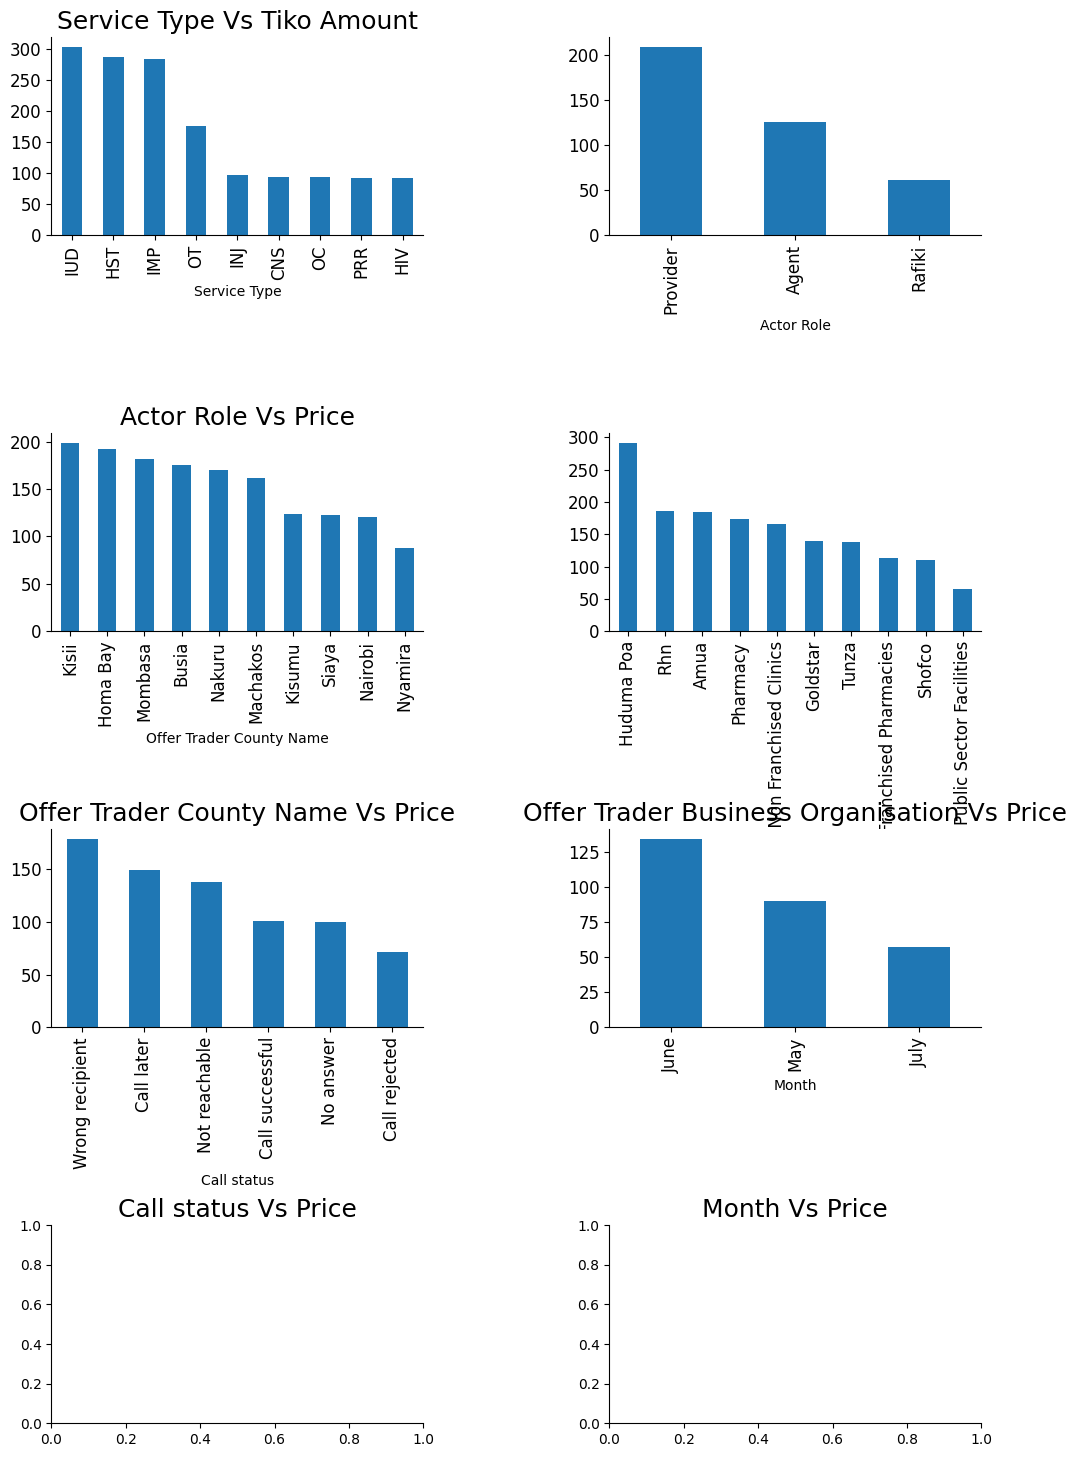

In [19]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
merged_data.groupby('Service Type')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Service Type Vs Tiko Amount", fontsize=18)
merged_data.groupby('Actor Role')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[1][0].set_title("Actor Role Vs Price", fontsize=18)
merged_data.groupby('Offer Trader County Name')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[2][0].set_title("Offer Trader County Name Vs Price", fontsize=18)
merged_data.groupby('Offer Trader Business Organisation')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[2][1].set_title("Offer Trader Business Organisation Vs Price", fontsize=18)
merged_data.groupby('Call status')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[3][0].set_title("Call status Vs Price", fontsize=18)
merged_data.groupby('Month')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[3][1].set_title("Month Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the merged_dataset')
sns.countplot(ax = axes[0, 0], x = 'Call status', merged_data = merged_data, color = 'blue', 
              order = merged_data['Call status'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Month', merged_data = merged_data, color = 'blue', 
              order = merged_data['Month'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Offer Trader Name', merged_data = merged_data, color = 'blue', 
              order = merged_data['Offer Trader Name'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Enrolment Path Classifier', merged_data = merged_data, color = 'blue', 
              order = merged_data['Enrolment Path Classifier'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Enrolment type', merged_data = merged_data, color = 'blue', 
              order = merged_data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Enrolment type', merged_data = merged_data, color = 'blue', 
              order = merged_data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);